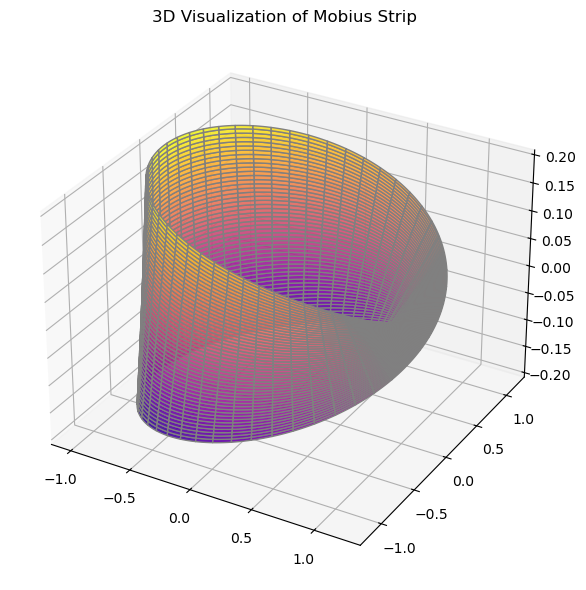

Surface Area: 0.00010
Edge Length: 12.62998


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
class MobiusStrip:
    #Main class where we need to initialize every variable used in differnt functions
    def __init__(self, R=1, w=1, n=100):
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w/2, w/2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self._generate_mesh()
    def _generate_mesh(self):
        # Parametric equations of Mobius Strip
        u, v = self.U, self.V
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z
    def surface_area_calculation(self):
        # Calculate the surface area by calculating the norm of the cross product of the surface tangents
        dx = np.gradient(self.X)
        dy = np.gradient(self.Y)
        dz = np.gradient(self.Z)
        dS = np.sqrt((dx[0]**2 + dy[0]**2 + dz[0]**2) * (dx[1]**2 + dy[1]**2 + dz[1]**2))
        return np.sum(dS) * (2 * np.pi / self.n) * (self.w / self.n)
    def edge_length_calculation(self):
        # Calculate total edge length along the Mobius strip boundaries
        u = self.u
        w = self.w
        w_by_2 = w/2
        u_by_2 = u/2
        v_1 = w_by_2 
        v_2 = -w_by_2
        x_1 = (self.R + v_1 * np.cos(u_by_2)) * np.cos(u)
        y_1 = (self.R + v_1 * np.cos(u_by_2)) * np.sin(u)
        z_1 = v_1 * np.sin(u / 2)
        x_2 = (self.R + v_2 * np.cos(u_by_2)) * np.cos(u)
        y_2 = (self.R + v_2 * np.cos(u_by_2)) * np.sin(u)
        z_2 = v_2 * np.sin(u_by_2)
        # Calculate edge length using Euclidean distance
        len_1 = np.sum(np.sqrt(np.diff(x_1)**2 + np.diff(y_1)**2 + np.diff(z_1)**2))
        len_2 = np.sum(np.sqrt(np.diff(x_2)**2 + np.diff(y_2)**2 + np.diff(z_2)**2))
        return len_1 + len_2
    def display_3D_Model(self):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, cmap='plasma', edgecolor='gray', alpha=0.9)
        ax.set_title("3D Visualization of Mobius Strip")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    mobius = MobiusStrip(R=1.0, w=0.4, n=250)
    mobius.display_3D_Model()
    print(f"Surface Area: {mobius.surface_area_calculation():.5f}")
    print(f"Edge Length: {mobius.edge_length_calculation():.5f}")
